Original:


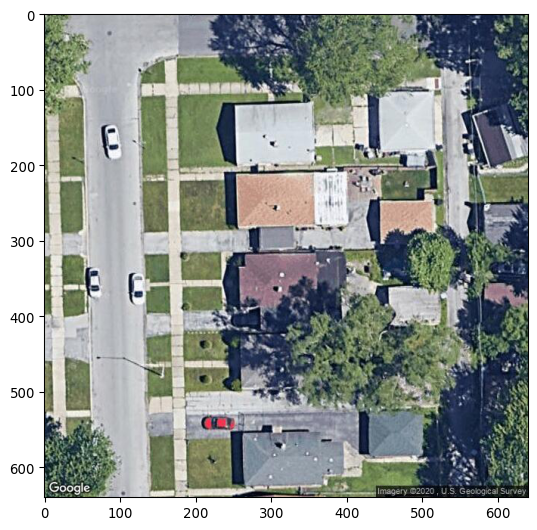

In [6]:
import imageio
import imgaug as ia
from imgaug.augmentables.bbs import BoundingBox, BoundingBoxesOnImage
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

image = imageio.imread('image-211_41.664575_-87.65457599999999.jpg')

print("Original:")
ia.imshow(image)

In [2]:
H,W = image.shape[0], image.shape[1]

In [3]:
import numpy as np
yolo_bb_before_fix = np.loadtxt('image-211_41.664575_-87.65457599999999_before_fix.txt')
yolo_bb_after_fix = np.loadtxt('image-211_41.664575_-87.65457599999999_after_fix.txt')

# convert yolo bounding box to imgaug format
def convertYOLO2ImgAug(yolo_bb):
    assert yolo_bb.ndim == 2
    imgaug_bb = np.zeros_like(yolo_bb)
    for n, bb in enumerate(yolo_bb):
        class_id = bb[0]
        center_x, center_y, w, h = bb[1] * W, bb[2] * H, bb[3] * W, bb[4] * H
        x1 = center_x - w / 2
        y1 = center_y - h / 2
        x2 = center_x + w / 2
        y2 = center_y + h / 2
        imgaug_bb[n] = np.array([class_id, x1, y1, x2, y2])
    return imgaug_bb

imgaug_bb_before_fix = convertYOLO2ImgAug(yolo_bb_before_fix)
imgaug_bb_after_fix = convertYOLO2ImgAug(yolo_bb_after_fix)    

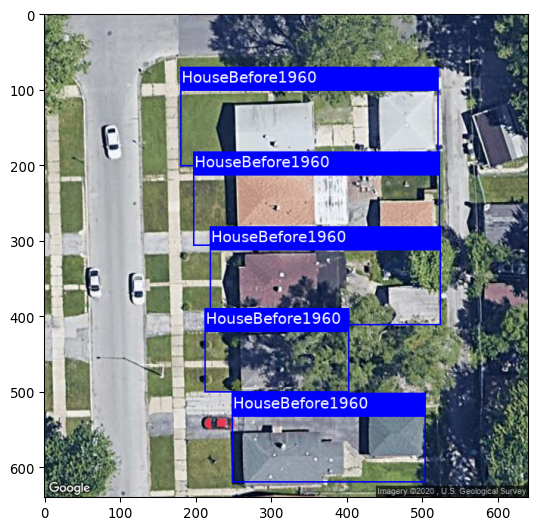

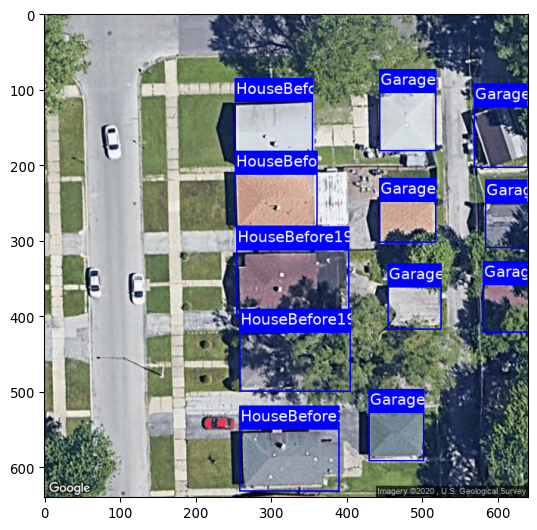

In [10]:
draw_imgaug_before_fix = BoundingBoxesOnImage.from_xyxy_array(imgaug_bb_before_fix[:, 1:], shape=image.shape)
draw_imgaug_after_fix = BoundingBoxesOnImage.from_xyxy_array(imgaug_bb_after_fix[:, 1:], shape=image.shape)

# set up label and draw
def draw_with_label(draw_bbox, imgaug_bb, img):
    for n, bb in enumerate(draw_bbox):
        label = None
        if imgaug_bb[n, 0] == 0:
            label = 'HouseBefore1960'
        if imgaug_bb[n, 0] == 1:
            label = 'HouseAfter1960'
        if imgaug_bb[n, 0] == 2:
            label = 'Garage'
        bb.label = label
    return draw_bbox.draw_on_image(img, size=2, color=[0,0,255])

a = draw_with_label(draw_imgaug_before_fix, imgaug_bb_before_fix, image)
b = draw_with_label(draw_imgaug_after_fix, imgaug_bb_after_fix, image)
ia.imshow(a)
ia.imshow(b)